Here’s a detailed explanation of feature selection techniques in machine learning, followed by a Python notebook layout for practical implementation. 

---

### **Feature Selection Techniques**
Feature selection involves selecting the most important variables that contribute to predicting the target variable while removing redundant or irrelevant features. It improves model performance, reduces overfitting, and makes models faster and easier to interpret.

#### **Types of Feature Selection Methods**

1. **Filter Methods**  
   - Select features based on statistical measures like correlation or variance.
   - Techniques include:
     - **Variance Thresholding**
     - **Correlation Matrix**
     - **Mutual Information**

2. **Wrapper Methods**  
   - Use a predictive model to evaluate the performance of feature subsets.
   - Techniques include:
     - **Recursive Feature Elimination (RFE)**
     - **Forward Selection**
     - **Backward Elimination**

3. **Embedded Methods**  
   - Feature selection is part of the model training process.
   - Techniques include:
     - **LASSO (L1 Regularization)**
     - **Decision Tree-based feature importance**

---

In [66]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California Housing Dataset
data = fetch_california_housing(as_frame=True)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 1. Filter Method: Variance Threshold
def filter_variance_threshold(X, threshold=0.01):
    selector = VarianceThreshold(threshold)
    X_var = selector.fit_transform(X)
    selected_features = X.columns[selector.get_support()]
    print(f"Selected Features: {list(selected_features)}")
    return pd.DataFrame(X_var, columns=selected_features)

X_var_filtered = filter_variance_threshold(X)

# 2. Filter Method: Mutual Information
def filter_mutual_information(X, y, k=5):
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    X_mutual = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print(f"Top {k} Features by Mutual Information: {list(selected_features)}")
    return pd.DataFrame(X_mutual, columns=selected_features)

X_mutual_filtered = filter_mutual_information(X, y, k=5)

# 3. Wrapper Method: Recursive Feature Elimination (RFE)
def wrapper_rfe(X, y, n_features_to_select=5):
    model = RandomForestRegressor(random_state=42)
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = X.columns[rfe.support_]
    print(f"Top {n_features_to_select} Features by RFE: {list(selected_features)}")
    return pd.DataFrame(X[selected_features])

X_rfe_filtered = wrapper_rfe(X, y)

# 4. Embedded Method: Lasso (L1 Regularization)
def embedded_lasso(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_scaled, y)
    selected_features = X.columns[lasso.coef_ != 0]
    print(f"Selected Features by Lasso: {list(selected_features)}")
    return pd.DataFrame(X[selected_features])

X_lasso_filtered = embedded_lasso(X, y)

# 5. Tree-Based Feature Importance
def tree_based_feature_importance(X, y):
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    importance = pd.DataFrame(
        {"Feature": X.columns, "Importance": model.feature_importances_}
    ).sort_values(by="Importance", ascending=False)
    print("Feature Importance (Tree-based):")
    print(importance)
    return importance

feature_importance = tree_based_feature_importance(X, y)

# Output and Summary
print("\nSummary:")
print("Filtered Features (Variance Threshold):", list(X_var_filtered.columns))
print("Filtered Features (Mutual Information):", list(X_mutual_filtered.columns))
print("Filtered Features (RFE):", list(X_rfe_filtered.columns))
print("Filtered Features (Lasso):", list(X_lasso_filtered.columns))
# Test one function directly


Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Top 5 Features by Mutual Information: ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
Top 5 Features by RFE: ['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude']
Selected Features by Lasso: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature Importance (Tree-based):
      Feature  Importance
0      MedInc    0.520037
5    AveOccup    0.136406
6    Latitude    0.092856
7   Longitude    0.092694
1    HouseAge    0.052964
2    AveRooms    0.044513
4  Population    0.031232
3   AveBedrms    0.029299

Summary:
Filtered Features (Variance Threshold): ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Filtered Features (Mutual Information): ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
Filtered Features (RFE): ['MedInc', 'HouseAge', 'AveOccup'

---

### **Steps in Notebook**

1. **Load Libraries and Dataset**:
   - Use datasets like Iris or Boston Housing.
   - Preprocess features using scaling if necessary.

2. **Filter Methods**:
   - **Variance Threshold** to eliminate low-variance features.
   - **Mutual Information** to find the features most related to the target.

3. **Wrapper Methods**:
   - Apply **RFE** with a classifier like Random Forest.

4. **Embedded Methods**:
   - Use **LASSO** for feature selection through regularization.
   - Evaluate **Tree-based feature importance**.

5. **Summary**:
   - Print selected features from each technique.



# Simple explanation

---

## **1. Variance Thresholding**
### **What it is**:
Variance Thresholding removes features (columns) that don't change much in your data. If a feature has the same value for most rows (or has very little variation), it won't help the model learn anything useful.

### **Example**:
Imagine you have a dataset of student scores in different subjects:

| Student | Math | English | Science |
|---------|------|---------|---------|
| A       | 85   | 90      | 75      |
| B       | 85   | 92      | 76      |
| C       | 85   | 88      | 74      |

In this case:
- **Math** has no variation (all students have the same score: 85), so its variance is 0.
- **English** and **Science** have different values and thus have variance.

### **Result**:
Since the **Math** feature has no variation, we would **remove it** using Variance Thresholding because it won't help the model make predictions.

In [81]:
from sklearn.feature_selection import VarianceThreshold

# Example data
import numpy as np
X = np.array([[0, 2, 0, 3],
              [0, 1, 4, 3],
              [0, 1, 1, 3]])

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.5)  # Set variance threshold
X_selected = selector.fit_transform(X)

print("Selected Features:\n", X_selected)


Selected Features:
 [[0]
 [4]
 [1]]


---

## **2. Correlation Matrix**
### **What it is**:
The correlation matrix shows how much two features are related to each other. If two features are very similar (correlated), you might not need both, because they give the same information.

### **Example**:
Imagine you have a dataset about house prices:

| House | Size (sq ft) | Bedrooms | Price |
|-------|--------------|----------|-------|
| 1     | 1200         | 3        | 300000|
| 2     | 1500         | 4        | 350000|
| 3     | 1800         | 4        | 400000|

- **Size** and **Bedrooms** are related. Bigger houses tend to have more bedrooms.
- A **high correlation** means these two features give similar information.

### **Result**:
If the correlation between **Size** and **Bedrooms** is high (e.g., above 0.9), you can **remove one** (e.g., **Bedrooms**) to avoid redundancy. This keeps the model simpler and faster.

Features to drop: ['B', 'C', 'D']


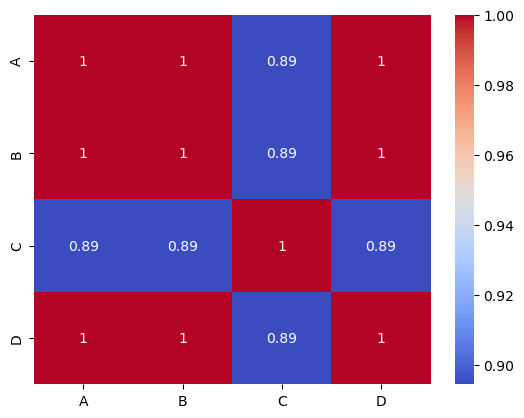

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

# Example dataset
data = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [2, 4, 6, 8],
    'C': [1, 1, 2, 2],
    'D': [10, 20, 30, 40]
})

# Compute correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Remove features with high correlation (e.g., r > 0.8)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to drop:", to_drop)

# Drop the features
data_selected = data.drop(columns=to_drop)

---

## **3. Mutual Information**
### **What it is**:
Mutual Information tells us how much one feature helps in predicting the target (the thing you're trying to predict). Features that give a lot of useful information about the target are kept, while those that don’t are removed.

### **Example**:
Let's say you're trying to predict if someone buys a product (Yes or No) based on two features:
1. **Age** (How old the person is)
2. **Height** (How tall the person is)

| Person | Age | Height | Bought Product |
|--------|-----|--------|----------------|
| 1      | 25  | 160    | Yes            |
| 2      | 30  | 170    | No             |
| 3      | 22  | 165    | Yes            |
| 4      | 28  | 168    | No             |

- **Age** might tell you something useful about whether a person buys the product (e.g., younger people tend to buy more).
- **Height**, on the other hand, might not have any relationship with whether they buy the product.

### **Result**:
- **Age** has high Mutual Information with the target (whether they bought the product), so it’s kept.
- **Height** has low Mutual Information with the target, so it might be **removed**.

---

### **Summary**:
1. **Variance Thresholding**: Remove features that don’t change much (like a column where every value is the same).
2. **Correlation Matrix**: Remove one of two features that are highly related to each other (like "Size" and "Bedrooms").
3. **Mutual Information**: Keep features that help predict the target (like "Age" for predicting whether a person buys something).

Would you like to see how these methods are implemented in a real dataset?

In [74]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

# Example dataset
X = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [2, 4, 6, 8],
    'C': [1, 1, 2, 2]
})
y = [0, 1, 0, 1]  # Target variable

# Compute mutual information
mi_scores = mutual_info_classif(X, y)

# Display MI scores
mi_scores = pd.Series(mi_scores, index=X.columns)
print("Mutual Information Scores:\n", mi_scores)

# Select features based on threshold
selected_features = mi_scores[mi_scores > 0.1].index
print("Selected Features:", list(selected_features))


Mutual Information Scores:
 A    0
B    0
C    0
dtype: int64
Selected Features: []



---

## **4. ANOVA (Analysis of Variance)**
### **What it is**:
ANOVA is a statistical method that checks if there are any significant differences between the means of two or more groups. In feature selection, it's used to see how much a feature is related to the target variable. ANOVA tests if different values of a feature lead to different target values.

### **How it works**:
- ANOVA compares the mean of the target variable for each group (based on a feature) and checks if the differences between those means are statistically significant.
- A **high p-value** indicates that the feature doesn't contribute much to predicting the target, and it can be **removed**. A **low p-value** means the feature is useful.

### **Example**:
Imagine you have a dataset where the target variable is whether a student passed or failed a course (binary: Pass/Fail). The feature is the **study hours**:

| Student | Study Hours | Passed (Target) |
|---------|-------------|-----------------|
| A       | 2           | Fail            |
| B       | 3           | Fail            |
| C       | 8           | Pass            |
| D       | 9           | Pass            |

You want to know if the **study hours** are significantly different between the "Pass" and "Fail" groups.

- ANOVA tests if the average number of study hours is significantly different between the "Pass" and "Fail" groups.

### **Result**:
- If **study hours** are significantly different between the "Pass" and "Fail" groups (low p-value), then **study hours** is a **useful feature**.
- If the p-value is high, this feature doesn't help much and can be removed.

### **Steps in Python**:
```python

In [76]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Example data
data = pd.DataFrame({
    'Study Hours': [2, 3, 8, 9],
    'Passed': ['Fail', 'Fail', 'Pass', 'Pass']
})

# Convert categorical target to numerical (0 = Fail, 1 = Pass)
data['Passed'] = data['Passed'].map({'Fail': 0, 'Pass': 1})

# Apply ANOVA F-test (used for classification)
f_statistic, p_value = f_classif(data[['Study Hours']], data['Passed'])
print("ANOVA p-value:", p_value)

ANOVA p-value: [0.01360608]


### **When to use**:
- **Classification problems** where the target is categorical.
- Check the relationship between a continuous feature and a categorical target.

---

## **5. Chi-Square Test**
### **What it is**:
The **Chi-Square** test is used to measure how well a categorical feature matches with the target. It checks if there's a statistically significant association between the feature and the target variable.

### **How it works**:
- The test compares the observed frequency of each combination of feature and target to the expected frequency (what you'd expect if there was no relationship).
- A **low p-value** indicates a significant relationship, and a **high p-value** means no relationship, suggesting the feature might be removed.

### **Example**:
Imagine you have a dataset of students and whether they passed or failed the course, but this time the **study method** is a categorical feature (e.g., "Self-Study" or "Group Study"):

| Student | Study Method  | Passed (Target) |
|---------|---------------|-----------------|
| A       | Self-Study    | Fail            |
| B       | Group Study   | Pass            |
| C       | Self-Study    | Pass            |
| D       | Group Study   | Fail            |

You want to know if the **Study Method** is associated with whether a student passes or fails.

### **Result**:
- The **Chi-Square test** will tell you if the **Study Method** (Self-Study or Group Study) is related to the target (Pass or Fail).
- If there's a strong relationship (low p-value), the feature is **useful**. If there's no relationship (high p-value), you may want to **drop the feature**.

### **Steps in Python**:
```python

In [15]:
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example data
data = pd.DataFrame({
    'Study Method': ['Self-Study', 'Group Study', 'Self-Study', 'Group Study'],
    'Passed': ['Fail', 'Pass', 'Pass', 'Fail']
})

# Convert categorical data to numerical
encoder = LabelEncoder()
data['Study Method'] = encoder.fit_transform(data['Study Method'])
data['Passed'] = encoder.fit_transform(data['Passed'])

# Apply Chi-Square test
chi2_stat, p_value = chi2(data[['Study Method']], data['Passed'])
print("Chi-Square p-value:", p_value)

Chi-Square p-value: [1.]



### **When to use**:
- **Classification problems** with **categorical data**.
- Determine the relationship between categorical features and a categorical target.

---

### **Summary of ANOVA and Chi-Square**:

| Technique          | Type of Data            | What it Measures                                  | Use Case                                  |
|--------------------|-------------------------|---------------------------------------------------|------------------------------------------|
| **ANOVA**          | Continuous Feature, Categorical Target | How different feature groups (values) affect the target | Use for classification (numeric features with categorical target) |
| **Chi-Square**     | Categorical Feature, Categorical Target  | How much a feature is related to the target       | Use for classification (categorical features with categorical target) |

### **When to use**:
- **ANOVA**: When you have a **numeric feature** and a **categorical target**.
- **Chi-Square**: When both the **feature** and **target** are **categorical**.

Would you like to try these tests with a sample dataset, or do you have specific data you'd like to apply them to?